In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.features import DivIcon
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline 
from imblearn.over_sampling import SMOTE

# Match Gas Stations with EV

In [ ]:
# load gas station data
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Capstone-KPMG/Preprocessing/Data
!ls
df_gas = pd.read_csv("main_dataset_all_interstate_all_route_10mi_w_income.csv")
df_gas.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Capstone-KPMG/Preprocessing/Data
'alt_fuel_stations(Sep_25_2022).csv'
 attraction_point.csv
 cleaned_main_data.csv
'Copy of I5Exits.csv'
 gas_station_w_10mi_to_exit_I5_1.csv
 gas_station_w_10mi_to_exit_I5_2.csv
 gas_station_w_10mi_to_exit_I5_3.csv
 gas_station_w_10mi_to_exit_I5_4.csv
 gas_station_w_10mi_to_exit_I5_5.csv
 gas_station_w_10mi_to_exit_I5_6.csv
 gas_station_w_10mi_to_exit_I82.csv
 gas_station_w_10mi_to_exit_I90_1.csv
 gas_station_w_10mi_to_exit_I90_2.csv
 gas_station_w_10mi_to_exit_whole.csv
 gas_station_w_attr.csv
 gas_station_w_crime_population.csv
 gas_station_w_dist_to_exit_all.csv
 gas_station_w_dist_to_exit_I5_1.csv
 gas_station_w_dist_to_exit_I5_2.csv
 gas_station_w_dist_to_exit_I5_3.csv
 gas_station_w_dist_to_exit_I5_4.csv
 gas_station_w_dist_to_exit_I5.csv
 gas_station_w_dist_to_exit_I82.csv
 gas_station_w_dist_t

,Unnamed: 0,gas_key,gas_name,gas_lat,gas_long,attr_cnt_1mile,attr_cnt_5mile,attr_name,attr_lat,attr_long,...,nri_zipcode,census_tract_area,census_tract_category,traff_cnt_10m_avg,traff_cnt_10m_max,traff_cnt_5m_avg,traff_cnt_5m_max,zip,zip_income,household_median_income
0,0,0,24 Hour Express Fuel,48.393760,-122.329806,0,1,Skagit County Fairgrounds,48.408145,-122.340118,...,98273.0,0.002191,2.0,21209.859155,72000,23733.802817,72000,98273,98273.0,64699
1,1,1,76,47.191712,-120.916225,0,1,KBHR Set,47.223241,-120.993224,...,NaN,0.000584,2.0,11678.727273,36000,9901.025641,34000,98922,98922.0,61071
2,2,2,76,47.238704,-122.357577,0,4,Wagon Trail,47.275437,-122.308897,...,98424.0,0.001614,2.0,39766.900000,219000,43117.857143,219000,98424,98424.0,78243
3,3,3,76,48.435227,-122.291324,0,1,Skagit County Fairgrounds,48.408145,-122.340118,...,NaN,0.001533,2.0,20470.068493,72000,23101.204819,72000,98273,98273.0,64699
4,4,4,76,47.839608,-120.014523,0,0,NaN,NaN,NaN,...,NaN,0.018331,0.0,5653.947368,12000,6723.076923,12000,98817,98817.0,71279


In [ ]:
# load ev station data
%cd /content/drive/My Drive/Capstone-KPMG/Data_Exploration/4_EVChargingStationLocations
!ls

df_ev = pd.read_csv("alt_fuel_stations(Sep_25_2022).csv").query("State == 'WA'")
df_ev.head()

/content/drive/My Drive/Capstone-KPMG/Data_Exploration/4_EVChargingStationLocations
'alt_fuel_stations(Sep_25_2022).csv'


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,31,39,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
74,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,NaN,360-491-3214,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
94,ELEC,Avista Corp,1411 E Mission Ave,NaN,Spokane,WA,99252,NaN,509-489-0500,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
95,ELEC,Steam Plant Grill,159 S Lincoln St,NaN,Spokane,WA,99201,NaN,509-777-3900,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
121,ELEC,BELLEVUE BELLEVUE CH 1,450 110th Ave NE,NaN,Bellevue,WA,98004,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,ELEC,The Evergreen State College,2700 Evergreen Pkwy NW,Parking Lot C,Olympia,WA,98505,NaN,360-867-6352,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [ ]:
# encode lat long
! pip install pygeohash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://pypi.org/project/pygeohash/

Setting precision = 6: maximum X axis error of +- 0.61 km (600m) \\
Setting precision = 7: maximum X axis error of +- 0.076 km (76m) \\
Setting precision = 8: maximum X axis error of +- 0.019 km (19m)

In [ ]:
import pygeohash as pgh

preci = 8


df_ev['zone'] = df_ev.apply(lambda x: pgh.encode(x['Longitude'], x['Latitude'], precision=preci), axis=1)
df_ev_use = df_ev[['zone','Station Name']]
df_ev_use.columns = ['zone','matched EV']

df_gas['zone'] = df_gas.apply(lambda x: pgh.encode(x['gas_long'], x['gas_lat'], precision=preci), axis=1)

In [ ]:
df_use = pd.merge(df_gas, df_ev_use, how="left", left_on="zone", right_on="zone")
df_use[df_use['matched EV'].isna()].shape

(1770, 61)

In [ ]:
df_use['matched'] = df_use['matched EV'].notna().astype(int)

In [ ]:
df_use['matched'].value_counts()/df_use.shape[0]

0    0.652896
1    0.347104
Name: matched, dtype: float64

In [ ]:
df_use.columns

Index(['Unnamed: 0', 'gas_key', 'gas_name', 'gas_lat', 'gas_long',
       'attr_cnt_1mile', 'attr_cnt_5mile', 'attr_name', 'attr_lat',
       'attr_long', 'distance_to_nearest_attr', 'crime_coord', 'crime_county',
       'crime_population', 'violent_crime', 'murder_nonnegligent_manslaughter',
       'Rape1', 'Robbery', 'aggravated_assault', 'property_crime', 'Burglary',
       'larceny_theft', 'motor_vehicle_theft', 'Arson', 'total_crime',
       'exit_name', 'exit_lat', 'exit_long', 'distance_to_nearest_exit',
       'highway', 'num_EV_in_2_miles_of_gas', 'num_EV_in_5_miles_of_gas',
       'num_EV_in_10_miles_of_gas', 'num_EV_in_20_miles_of_gas',
       'num_EV_in_50_miles_of_gas', 'Closest_EV_Station_name',
       'Closest_EV_Station_lat', 'Closest_EV_Station_long',
       'distance_to_closest_ev_station', 'nri_geoid', 'nri_county',
       'nri_population', 'nri_build_value', 'nri_agri_value', 'nri_area',
       'nri_risk_score', 'nri_risk_rating', 'nri_intpt_lat', 'nri_intpt_long',


In [ ]:
df_use[df_use['matched EV'].isna()]

,Unnamed: 0,gas_key,gas_name,gas_lat,gas_long,attr_cnt_1mile,attr_cnt_5mile,attr_name,attr_lat,attr_long,...,traff_cnt_10m_avg,traff_cnt_10m_max,traff_cnt_5m_avg,traff_cnt_5m_max,zip,zip_income,household_median_income,zone,matched EV,matched
0,0,0,24 Hour Express Fuel,48.393760,-122.329806,0,1,Skagit County Fairgrounds,48.408145,-122.340118,...,21209.859155,72000,23733.802817,72000,98273,98273.0,64699,j042j0p2,NaN,0
1,1,1,76,47.191712,-120.916225,0,1,KBHR Set,47.223241,-120.993224,...,11678.727273,36000,9901.025641,34000,98922,98922.0,61071,j0181b5b,NaN,0
6,3,3,76,48.435227,-122.291324,0,1,Skagit County Fairgrounds,48.408145,-122.340118,...,20470.068493,72000,23101.204819,72000,98273,98273.0,64699,j042n0j2,NaN,0
7,4,4,76,47.839608,-120.014523,0,0,NaN,NaN,NaN,...,5653.947368,12000,6723.076923,12000,98817,98817.0,71279,j0400858,NaN,0
8,5,5,76,47.139542,-122.097343,0,1,Caboose,47.103339,-122.045301,...,27157.016129,104000,15800.000000,44000,98385,98385.0,88625,j01808jb,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,2205,2205,NaN,46.900172,-124.106692,0,1,Street of Flags Veterens Memorial,46.871341,-124.103763,...,3738.461538,8500,3460.000000,5800,98595,98595.0,53750,j01250p8,NaN,0
2706,2206,2206,NaN,48.198460,-122.127847,0,1,Giant Arborvitae (Big Cedar Stump),48.168640,-122.189179,...,26655.473684,123000,26604.166667,102000,98223,98223.0,83116,j0420b10,NaN,0
2707,2207,2207,NaN,48.556192,-122.344545,0,0,NaN,NaN,NaN,...,19216.976744,72000,17606.250000,49000,98232,98232.0,88551,j0480bj8,NaN,0
2708,2208,2208,NaN,48.747436,-122.475199,1,1,Mindport Exhibits,48.750881,-122.480674,...,21385.658915,69000,23751.250000,69000,98225,98225.0,53093,j048j20b,NaN,0


# Modeling: Preprocessing

In [ ]:
df_use['census_tract_category'].value_counts()

2.0    1976
1.0     380
0.0     352
Name: census_tract_category, dtype: int64

In [ ]:
# drop not useful columns
df_use_cleaned = df_use.drop(['Unnamed: 0', 'gas_key', 'gas_name', 'gas_lat', 'gas_long',
                              'attr_name', 'attr_lat', 'attr_long', 'attr_cnt_5mile', 
                              'crime_coord', 'crime_county', 'total_crime',                           
                              'exit_name', 'exit_lat', 'exit_long', 'distance_to_nearest_exit',
                              'Closest_EV_Station_name', 'Closest_EV_Station_lat', 'Closest_EV_Station_long', 'num_EV_in_2_miles_of_gas',
                              'nri_geoid', 'nri_county', 'nri_zipcode', 'nri_population', 'nri_intpt_lat', 'nri_intpt_long','nri_build_value', 'nri_agri_value', 'nri_area', 'nri_risk_rating',
                              'census_tract_area', 'distance_to_closest_ev_station',
                              'num_EV_in_5_miles_of_gas', 'num_EV_in_10_miles_of_gas', 'num_EV_in_20_miles_of_gas', 'num_EV_in_50_miles_of_gas',
                              'traff_cnt_10m_avg', 'traff_cnt_10m_max', 'traff_cnt_5m_avg', 'traff_cnt_5m_max',
                              'zone', 'matched EV', 'zip', 'zip_income'], axis = 1)

# fill na
df_use_cleaned['distance_to_nearest_attr'] = df_use_cleaned['distance_to_nearest_attr'].fillna(5)

# for na crime we take min
crime_list = ['violent_crime', 'murder_nonnegligent_manslaughter','Robbery', 'Rape1','Burglary', 'Arson','aggravated_assault', 'property_crime', 'larceny_theft', 'motor_vehicle_theft']
df_use_cleaned[crime_list] = df_use_cleaned[crime_list].apply(lambda x: x/df_use_cleaned['crime_population'], axis = 0)
for i in crime_list:
  df_use_cleaned[i]= df_use_cleaned[i].fillna(df_use_cleaned[i].min())

# for na nri we take average
# nri_list = ['nri_build_value', 'nri_agri_value', 'nri_area', 'nri_risk_score']
# for i in nri_list:
df_use_cleaned['nri_risk_score']= df_use_cleaned['nri_risk_score'].fillna(df_use_cleaned['nri_risk_score'].min())


# for na median income we take min (some areas has no median income record may infer hard-to-reach areas)
df_use_cleaned["household_median_income"] = df_use_cleaned["household_median_income"].apply(lambda x: np.nan if x == '-' else x)
df_use_cleaned["household_median_income"] = pd.to_numeric(df_use_cleaned["household_median_income"])
df_use_cleaned['household_median_income'] = df_use_cleaned['household_median_income'].fillna(df_use_cleaned['household_median_income'].min())

# # nri
#df_use_cleaned['nri_risk_rating'] = df_use_cleaned['nri_risk_rating'].fillna("Insufficient Data")

# def nri_type(x):
#   if x =='Very Low':
#     return -2
#   elif x == 'Relatively Low':
#     return -1
#   elif x == 'Relatively Moderate' or x == 'Insufficient Data' :
#     return 0
#   elif x == 'Relatively High':
#     return 1 
#   elif x == 'Very High':
#     return 2

# df_use_cleaned['nri_risk_rating'] = df_use_cleaned['nri_risk_rating'].apply(lambda x: nri_type(x))


# census tract
df_use_cleaned['census_tract_category'] = df_use_cleaned['census_tract_category'].fillna(2)
df_use_cleaned['census_tract_city'] = df_use_cleaned['census_tract_category'].apply(lambda x: 0 if x<2 else 1)

# drop additional unuseful columns
df_use_cleaned = df_use_cleaned.drop(['crime_population'], axis = 1)


df_use_cleaned.isna().sum()

attr_cnt_1mile                        0
distance_to_nearest_attr              0
violent_crime                         0
murder_nonnegligent_manslaughter      0
Rape1                                 0
Robbery                               0
aggravated_assault                    0
property_crime                        0
Burglary                              0
larceny_theft                         0
motor_vehicle_theft                   0
Arson                                 0
highway                             617
nri_risk_score                        0
census_tract_category                 0
household_median_income               0
matched                               0
census_tract_city                     0
dtype: int64

In [ ]:
# %cd /content/drive/My Drive/Capstone-KPMG/Preprocessing/Data

# df_use_cleaned.to_csv('cleaned_main_data.csv')

In [ ]:
df_use_cleaned.dtypes

attr_cnt_1mile                        int64
distance_to_nearest_attr            float64
violent_crime                       float64
murder_nonnegligent_manslaughter    float64
Rape1                               float64
Robbery                             float64
aggravated_assault                  float64
property_crime                      float64
Burglary                            float64
larceny_theft                       float64
motor_vehicle_theft                 float64
Arson                               float64
highway                              object
nri_risk_score                      float64
census_tract_category               float64
household_median_income             float64
matched                               int64
census_tract_city                     int64
dtype: object

In [ ]:
df_use_cleaned[df_use_cleaned['highway']!='I-5']

,attr_cnt_1mile,distance_to_nearest_attr,violent_crime,murder_nonnegligent_manslaughter,Rape1,Robbery,aggravated_assault,property_crime,Burglary,larceny_theft,motor_vehicle_theft,Arson,highway,nri_risk_score,census_tract_category,household_median_income,matched,census_tract_city
0,0,1.1020,0.001397,0.000027,0.000319,0.000373,0.000679,0.031173,0.003699,0.025173,0.002302,0.000093,I5,25.815695,2.0,64699.0,0,1
1,0,4.2247,0.002057,0.000000,0.000494,0.000247,0.001316,0.029984,0.003949,0.024760,0.001275,0.000123,I90,10.830549,2.0,61071.0,0,1
2,0,3.4174,0.006015,0.000040,0.000604,0.001387,0.003983,0.041052,0.006588,0.028933,0.005532,0.000316,I5,35.360714,2.0,78243.0,1,1
3,0,3.4174,0.006015,0.000040,0.000604,0.001387,0.003983,0.041052,0.006588,0.028933,0.005532,0.000316,I5,35.360714,2.0,78243.0,1,1
4,0,3.4174,0.006015,0.000040,0.000604,0.001387,0.003983,0.041052,0.006588,0.028933,0.005532,0.000316,I5,35.360714,2.0,78243.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,0,3.5008,0.002200,0.000021,0.000330,0.000513,0.001336,0.026116,0.003384,0.019016,0.003717,0.000082,I5,22.380426,2.0,83116.0,0,1
2707,0,5.0000,0.001397,0.000027,0.000319,0.000373,0.000679,0.031173,0.003699,0.025173,0.002302,0.000093,I5,10.830549,0.0,88551.0,0,0
2708,1,0.3452,0.002363,0.000035,0.000292,0.000558,0.001478,0.026554,0.003151,0.022349,0.001053,0.000071,I5,25.082713,2.0,53093.0,0,1
2709,1,0.8254,0.002363,0.000035,0.000292,0.000558,0.001478,0.026554,0.003151,0.022349,0.001053,0.000071,I5,25.082713,2.0,53093.0,1,1


In [ ]:
df_train = df_use_cleaned[df_use_cleaned['highway']!='I-5'].drop(['highway','census_tract_category'], axis = 1)
#df_test = df_use_cleaned[df_use_cleaned['highway'].notna()].drop(['highway','census_tract_category', 'matched'], axis = 1)

%cd /content/drive/My Drive/Capstone-KPMG/Modeling
result_list = pd.read_csv('optimization_result.csv')['gas_key'].to_list()
df_test = df_use_cleaned.iloc[df_use[df_use['gas_key'].isin(result_list)].index.tolist()].drop(['highway','census_tract_category', 'matched'], axis = 1)

print("train:", df_train.shape)
print("test:", df_test.shape)
print("total:", df_use_cleaned.shape)

/content/drive/My Drive/Capstone-KPMG/Modeling
train: (2711, 16)
test: (25, 15)
total: (2711, 18)


In [ ]:
df_train['matched'].value_counts()/len(df_train)

0    0.652896
1    0.347104
Name: matched, dtype: float64

# Remove counter-intuitive points

In [ ]:
df_train.columns

Index(['attr_cnt_1mile', 'distance_to_nearest_attr', 'violent_crime',
       'murder_nonnegligent_manslaughter', 'Rape1', 'Robbery',
       'aggravated_assault', 'property_crime', 'Burglary', 'larceny_theft',
       'motor_vehicle_theft', 'Arson', 'nri_risk_score',
       'household_median_income', 'matched', 'census_tract_city'],
      dtype='object')

In [ ]:
df_train11 = df_train.copy()

dropped_index = []

dropped_1 = df_train11[df_train11['matched'] == 1]

dropped_2 = df_train11[df_train11['matched'] != 1]

for i in crime_list:

  dropped_1 = dropped_1[dropped_1[i] > df_train11.describe()[i]['75%']]
  dropped_index += dropped_1.index.to_list()
  dropped_2 = dropped_2[dropped_2[i] < df_train11.describe()[i]['25%']]
  dropped_index += dropped_2.index.to_list()

print('original shape:', df_train11.shape)
print('dropped 1 shape:', len(set(dropped_index)))

df_train = df_train.drop(index = set(dropped_index))

original shape: (2711, 16)
dropped 1 shape: 751


# Model: Logistic Regression

<ipython-input-20-b1c1815b9971>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr = corr.mask(np.triu(np.ones(corr.shape)).astype(np.bool))


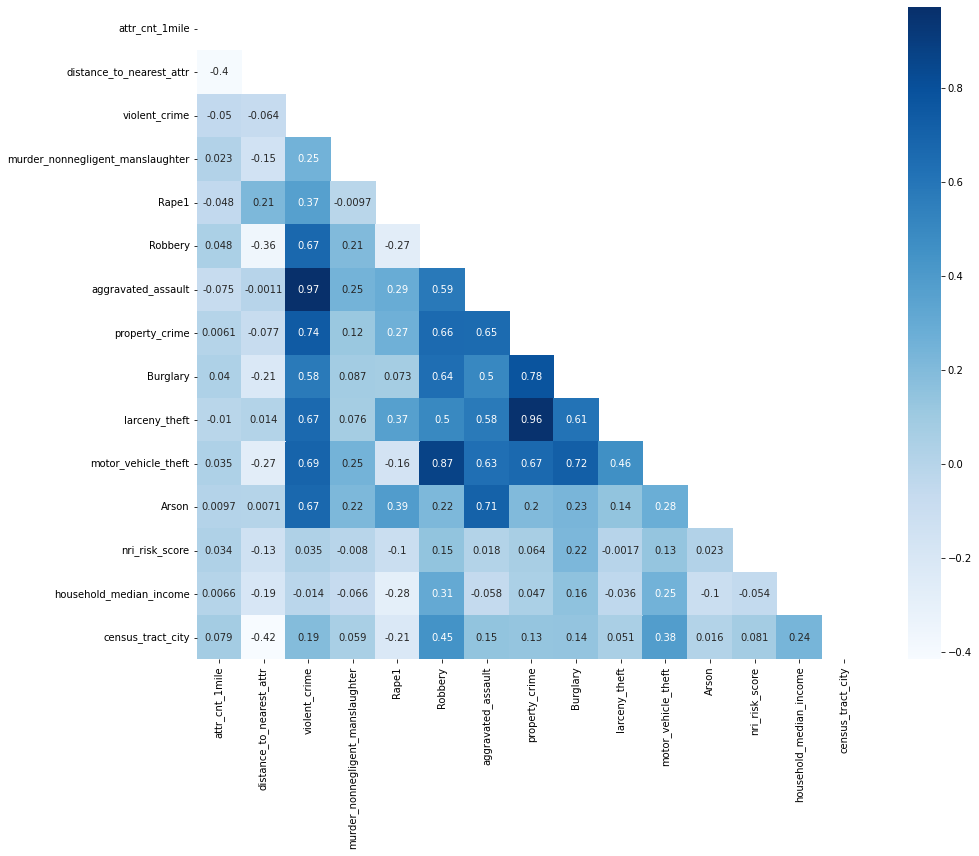

violent_crime
Robbery
property_crime


In [ ]:
corr = df_train.drop("matched", axis =1).corr()
corr = corr.mask(np.triu(np.ones(corr.shape)).astype(np.bool))
#corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot = True, cmap="Blues")
plt.show()

df_train1 = df_train.copy()
df_test1 = df_test.copy()

# remove highly correlated features
#np.fill_diagonal(corr.values, -2)
for col in corr.columns:
    if np.sum(corr[col]>0.8) > 0:
      print(col)
      df_train1 = df_train1.drop(col, axis =1)
      df_test1 = df_test1.drop(col, axis =1)

In [ ]:
df_X = df_train1.drop(columns=['matched'])
df_y = df_train1['matched']
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_y , test_size=0.2, stratify=df_train[['matched']])

In [ ]:
ss = StandardScaler()
X_dev_std = ss.fit_transform(X_dev)
X_test_std = ss.transform(X_test)
print("Shape of development features:", X_dev_std.shape) 
print("Shape of test features:", X_test_std.shape)

Shape of development features: (1568, 12)
Shape of test features: (392, 12)


In [ ]:
smote = SMOTE()
X_dev_smote, y_dev_smote= smote.fit_resample(X_dev_std, y_dev) 
print("Shape of SMOTE development feature:", X_dev_smote.shape) 
y_dev_smote.value_counts()

Shape of SMOTE development feature: (2018, 12)


1    1009
0    1009
Name: matched, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate

scores = cross_validate(LogisticRegression(solver='liblinear', fit_intercept = False), X_dev_smote, y_dev_smote,
                        cv = 5,
                        scoring = ['roc_auc','average_precision','recall'])

print("Recall:", scores['test_average_precision'].mean())
print("Average Precision:", scores['test_average_precision'].mean())
print("AUC:", scores['test_roc_auc'].mean())

Recall: 0.8273687762768377
Average Precision: 0.8273687762768377
AUC: 0.8480967991139293


In [ ]:
lr_smote = LogisticRegression(solver='liblinear', fit_intercept = False).fit(X_dev_smote, y_dev_smote)

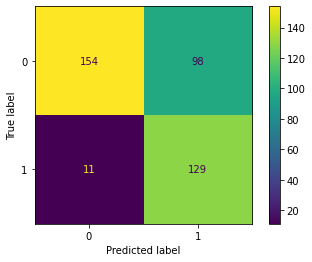

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(
confusion_matrix(y_test, lr_smote.predict(X_test_std))).plot()
plt.show()

In [ ]:
len(lr_smote.coef_[0])
#len(X_dev.columns.tolist())

12

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


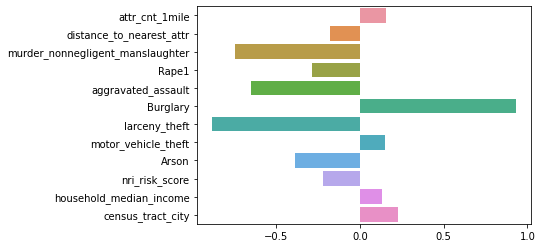

In [ ]:
col_names = X_dev.columns.tolist()
#col_names.insert(0,'bias')
sns.barplot(lr_smote.coef_[0], col_names)
sns.set(font_scale=1.3, rc={'figure.figsize':(6,5)})
#plt.xticks(rotation=90)
plt.show()

In [ ]:
# implementation

df_test_lr = df_use.iloc[df_test1.index]
df_test_std = ss.fit_transform(df_test1)

df_test_lr['score'] = np.round(lr_smote.predict_proba(df_test_std)[:,1],2)*100
df_test_lr['score'] = df_test_lr['score'].astype(int)
#np.sum(df_test_lr['matched'] == df_test_lr['predicted'])

<ipython-input-29-f2d5d0ab65c2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lr['score'] = np.round(lr_smote.predict_proba(df_test_std)[:,1],2)*100
<ipython-input-29-f2d5d0ab65c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lr['score'] = df_test_lr['score'].astype(int)


In [ ]:
#new_ev = df_test_lr[df_test_lr['matched'] == 0].query("predicted == 1")

In [ ]:
center = 47.7511, -120.7401

m = folium.Map(location=center, 
               zoom_start=7,
               width=800,height=600)

# Same as before... go through each home in set, make circle, and add to map.
# This time we add a color using price and the colormap object
for i in range(len(df_test_lr)):
    folium.Circle(
        location=[df_test_lr.iloc[i]['gas_lat'], df_test_lr.iloc[i]['gas_long']],
        radius=1000,
        fill=True,
        color = 'orange',
        fill_opacity=0.2
    ).add_to(m)

# for i in range(len(df_ev)):
#     folium.Circle(
#         location=[df_ev.iloc[i]['Latitude'], df_ev.iloc[i]['Longitude']],
#         radius=1000,
#         fill=True,
#         color = 'blue',
#         fill_opacity=0.2
#     ).add_to(m)

for i in range(len(df_test_lr)):
      folium.map.Marker([df_test_lr.iloc[i]['gas_lat'], df_test_lr.iloc[i]['gas_long']],
                      icon=DivIcon(
                          icon_size=(-10,15),
                          icon_anchor=(-10,14),
                          html=f'<div style="font-size: 14pt">%s</div>' % df_test_lr.iloc[i]['score'],
                      )
                     ).add_to(m)

m

In [ ]:
# 